## 1. Import Libraries
## 2. Use Elbow technique
## 3. k-means clustering
## 4. Interpretation
## 5. What these results could be useful for in future steps of an analytics pipeline.

### Import Libraries

In [33]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [34]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [35]:
path = 'C:/Users/ajkap/Final Achievement'

In [36]:
#Imported insurance_checked.csv
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'insurance_clean.csv'), index_col = False)

In [37]:
df.shape

(1337, 8)

In [38]:
df.columns

Index(['Unnamed: 0', 'age', 'sex', 'bmi', 'children', 'smoker', 'region',
       'insurance_charges'],
      dtype='object')

In [39]:
df.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,insurance_charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [40]:
#remove unamed column
df = df.drop(columns = ['Unnamed: 0'])

In [41]:
df.head()

,age,sex,bmi,children,smoker,region,insurance_charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [42]:
# Create a subset which contains only continuous data: age, bmi, insurance_charges

sub = df[['age', 'bmi', 'children', 'insurance_charges']]

### 2. The Elbow Techinique

In [43]:
# Define the range of potential clusters in the data
num_cl = range(1, 10)

# Defines k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [44]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] 

score

C:\Users\ajkap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ajkap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\ajkap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ajkap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[-195939158682.99286,
 -47969960260.4719,
 -22990572096.135185,
 -12118189115.397701,
 -8533710738.091306,
 -6164408565.818456,
 -4432903621.262303,
 -3498471175.644779,
 -2779486573.3611197]

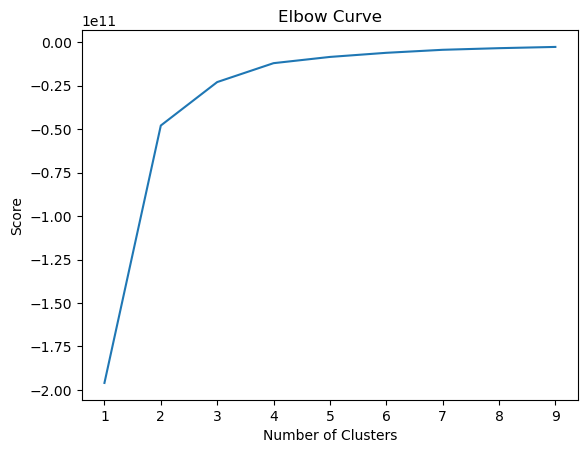

In [45]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The curve jumps from 3 to 4 but after that is only slightly increases. Will use 4 as the count for the clusters

## 3. k-means clustering

In [46]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 4) 

In [47]:
# Fit the k-means object to the data.
kmeans.fit(sub)

C:\Users\ajkap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ajkap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=4)

In [48]:
sub['clusters'] = kmeans.fit_predict(sub)

C:\Users\ajkap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ajkap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\ajkap\AppData\Local\Temp\ipykernel_9412\3683309691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [49]:
sub.head()

,age,bmi,children,insurance_charges,clusters
0,19,27.900,0,16884.92400,0
1,18,33.770,1,1725.55230,2
2,28,33.000,3,4449.46200,2
3,33,22.705,0,21984.47061,1
4,32,28.880,0,3866.85520,2


In [50]:
sub['clusters'].value_counts()

2    563
0    443
1    176
3    155
Name: clusters, dtype: int64

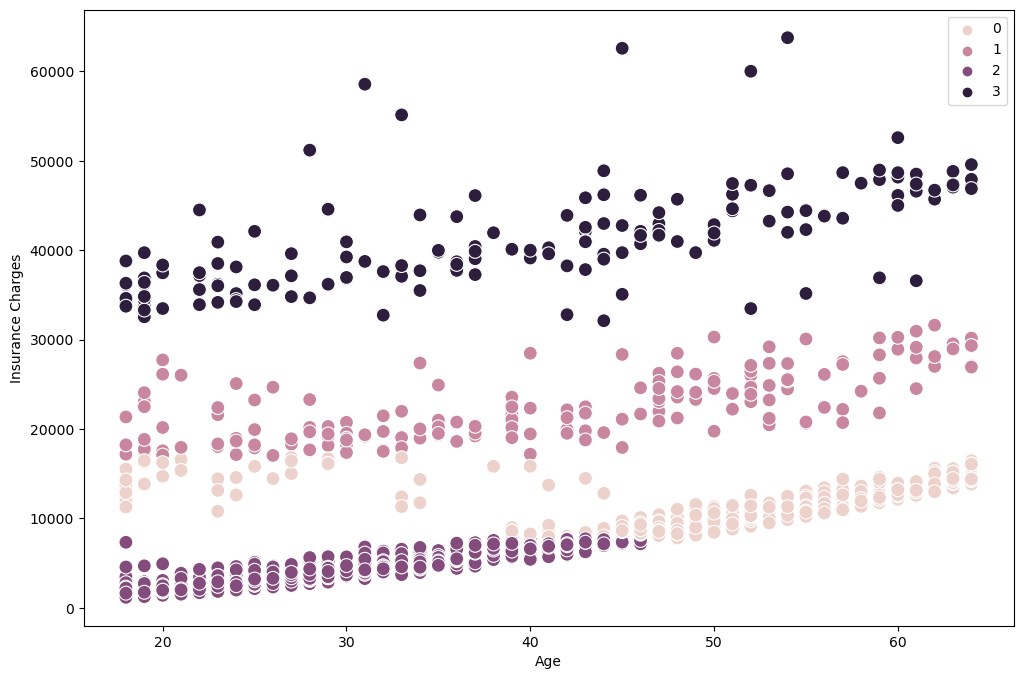

In [51]:
# Plot the clusters for the 'age' and 'insurance_charges' variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['age'], y=sub['insurance_charges'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Age')
plt.ylabel('Insurance Charges') 
plt.show()

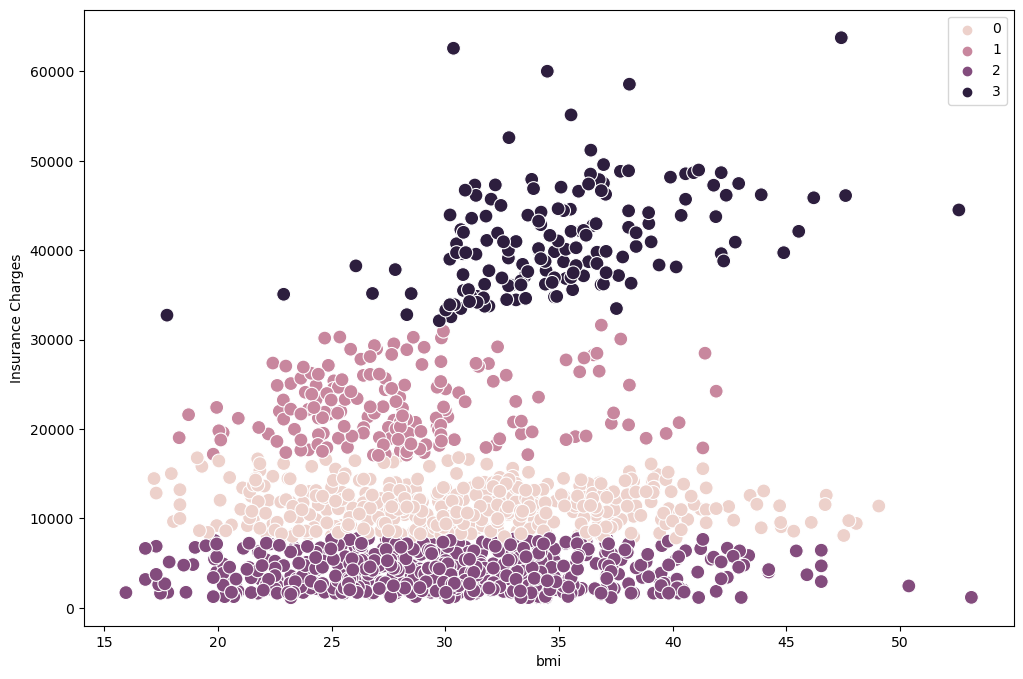

In [52]:
# Plot the clusters for the 'bmi' and 'insurance_charges' variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['bmi'], y=sub['insurance_charges'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('bmi')
plt.ylabel('Insurance Charges') 
plt.show()

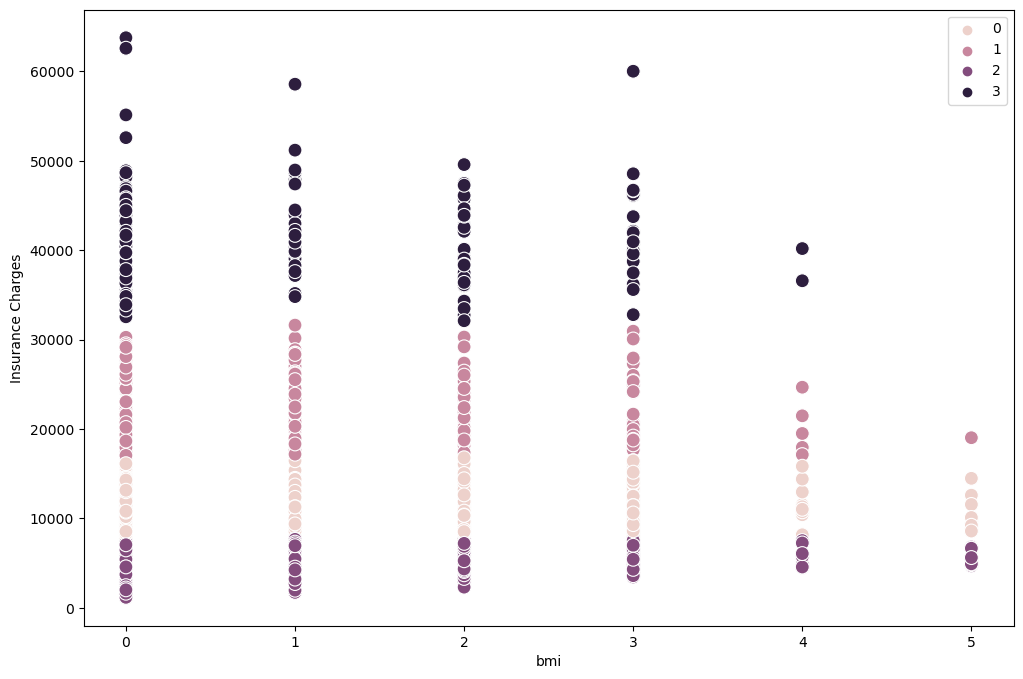

In [53]:
# Plot the clusters for the 'children' and 'insurance_charges' variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['children'], y=sub['insurance_charges'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('bmi')
plt.ylabel('Insurance Charges') 
plt.show()

## 4. Interpretation

### The scatterplot showing 'age' and 'insurance_charges' does not appear to have much of a relationship. The pink (0) cluster has people with high insurance charges that are that consists of people of all ages. The purple (1) cluster has appears to have insurance charges of under 1000 for people under the age of 50. The black (3) shows insurance charges that are in the range of 1800 to 3000 for all ages. The dark purple cluster (2) has less than 2000 of insurance charges for peopole of all ages. 

### The scatterplot showing 'bmi' and 'insurance_charges' shows the pink cluster (0) have the highest insurance charges of any cluster. They also have the highest bmi which could mean bmi is the best predictor of insurance charges compared to the other variables. The black cluster (3) has the second highest insurance charges but the average bmi is still lower than that of the pink cluster. Both the purple (1) and dark purple (2) clusters have very similar average bmi and insurance charges with their average bmi being around 30 for purple and 31 for dark purple. Interestingly, the insurance charges for the purple (1) cluster are on average 4237 which is less than half of what they are for dark purple which is about 11319. This could even a slight difference in bmi could significantly affect a person's insurance charges.

### The scatterplot showing 'children' and 'insurance_charges' do not appear to have any relationship

In [76]:
df.cluster= sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'
sub.loc[sub['clusters'] == 3, 'cluster'] = 'black'

In [73]:
sub.groupby('cluster').agg({'insurance_charges':['mean', 'median'], 
                         'age':['mean', 'median'], 
                         'bmi':['mean', 'median'],
                          'children':['mean', 'median']})

insurance_charges                      age               bmi  \
                         mean        median       mean median       mean   
cluster                                                                    
black            41224.580772  40103.890000  39.548387   40.0  35.045000   
dark purple       4237.478862   4189.113100  29.341030   29.0  30.098295   
pink             11318.896650  11244.376900  50.939052   53.0  30.841219   
purple           22525.020416  21785.661275  41.051136   42.5  28.165114   

                      children         
              median      mean median  
cluster                                
black        34.8000  1.135484    1.0  
dark purple  29.8300  1.010657    1.0  
pink         30.7800  1.139955    1.0  
purple       27.6225  1.221591    1.0

## 5. What these results could be useful for in future steps of an analytics pipeline.

### These results could be useful to further analyze my findings of a relationship between insurance_charges and bmi. I could for instance use supervised machine learning to further explore that relationship between those two variables to see if there is a correlation. I could explore the bmi and insurance_charges relationship further by creating a classification algorithm to predict insurance charges for a person based on how high or low their bmi is. Also, it looks like the high insurance charges people with high bmi could be the people who smoke. This could lead to a new hypthoesis that states the higher someone's bmi is, the more their insurance charges will be. It can also mean that age is not as big of an indicator on insurance charges as bmi. 

In [77]:
df_cluster.to_csv(r'FileName.csv', index=False)

AttributeError: 'str' object has no attribute 'to_csv'